In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
ds=pd.read_csv("cleaned_data.csv")

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23376 entries, 0 to 23375
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             23376 non-null  int64  
 1   POSTED_BY              23376 non-null  object 
 2   UNDER_CONSTRUCTION     23376 non-null  int64  
 3   RERA                   23376 non-null  int64  
 4   BHK_NO.                23376 non-null  int64  
 5   BHK_OR_RK              23376 non-null  object 
 6   SQUARE_FT              23376 non-null  float64
 7   READY_TO_MOVE          23376 non-null  int64  
 8   RESALE                 23376 non-null  int64  
 9   ADDRESS                23376 non-null  object 
 10  TARGET(PRICE_IN_LACS)  23376 non-null  float64
 11  CITY                   23376 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 2.1+ MB


In [11]:
#POSTED_BY - Pie chart to represent percentage
#UNDER_CONSTRUCTION - percentage
#RERA - percentage
#BHK_NO - Bar chart
#BHK_OR_RK - percentage
#READY_TO_MOVE - percentage
#RESALE - percentage
#CITY - bar chart

In [27]:
posted_by=ds.groupby("POSTED_BY")["POSTED_BY"].count()
print(posted_by)

POSTED_BY
Builder      572
Dealer     12897
Owner       9907
Name: POSTED_BY, dtype: int64


<Axes: ylabel='POSTED_BY'>

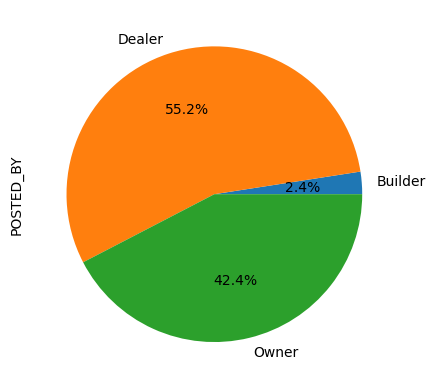

In [37]:
posted_by.plot(kind='pie',autopct='%1.1f%%')

In [41]:
under_construction=ds.groupby("UNDER_CONSTRUCTION")["UNDER_CONSTRUCTION"].count()
under_construction

UNDER_CONSTRUCTION
0    19321
1     4055
Name: UNDER_CONSTRUCTION, dtype: int64

<Axes: ylabel='UNDER_CONSTRUCTION'>

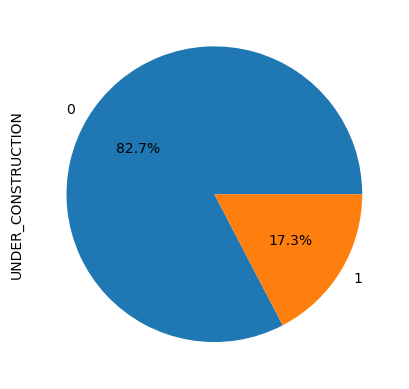

In [43]:
under_construction.plot(kind='pie',autopct='%1.1f%%')

In [47]:
rera=ds.groupby("RERA")["RERA"].count()
print(rera)

RERA
0    16526
1     6850
Name: RERA, dtype: int64


<Axes: ylabel='RERA'>

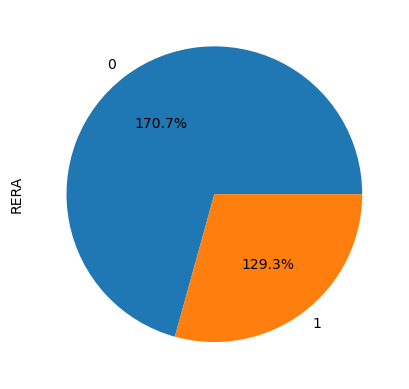

In [51]:
rera.plot(kind='pie',autopct='1%.1f%%')

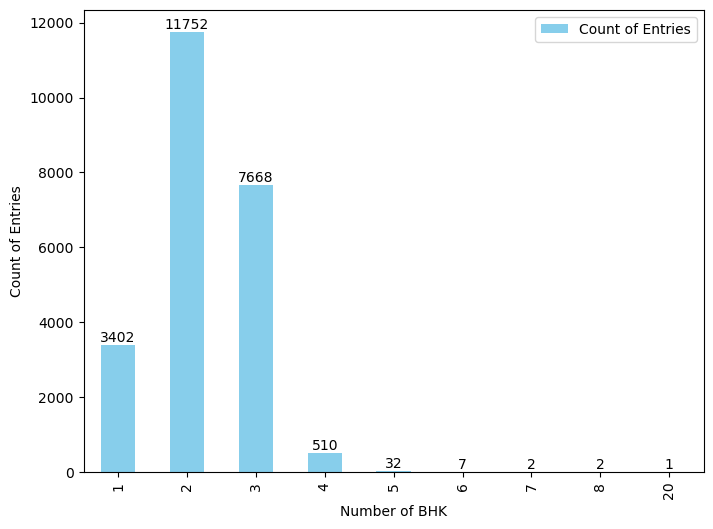

In [57]:
bhk = ds.groupby("BHK_NO.")["BHK_NO."].count()
ax = bhk.plot(kind='bar', color='skyblue', figsize=(8, 6))
ax.legend(["Count of Entries"], loc="upper right")
# Set labels and title
plt.xlabel("Number of BHK")
plt.ylabel("Count of Entries")
for i, v in enumerate(bhk):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)
# Display the plot
plt.show()

C:\Users\shete\AppData\Local\Temp\ipykernel_5220\2929726149.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=counts_df, x="TARGET(PRICE_IN_LACS)", y="CITY", palette="Blues_d", orient="h")


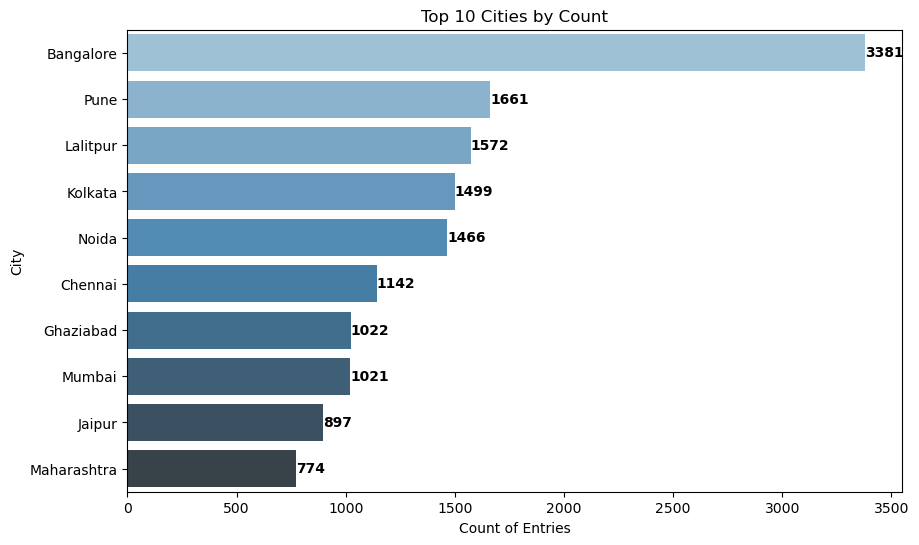

In [59]:
# Group by "CITY" and count the entries
citywisecount = ds.groupby("CITY")["TARGET(PRICE_IN_LACS)"].count()

# Order the result in descending order
citywisecount = citywisecount.sort_values(ascending=False)

# Get top 10 cities
counts = citywisecount.head(10)
counts_df = pd.DataFrame(counts).reset_index()


# Plot using Seaborn (Horizontal Bar Chart)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=counts_df, x="TARGET(PRICE_IN_LACS)", y="CITY", palette="Blues_d", orient="h")

# Add counts at the end of each bar
for index, value in enumerate(counts_df["TARGET(PRICE_IN_LACS)"]):
    ax.text(value + 0.1, index, str(value), va="center", fontweight="bold")

# Set labels and title
plt.xlabel("Count of Entries")
plt.ylabel("City")
plt.title("Top 10 Cities by Count")

# Display the plot
plt.show()